In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")

from gob.benchmarks import *
from gob.optimizers import *
import matplotlib
matplotlib.rcParams.update({"text.usetex": True})

In [2]:
class MinWrapper:
  def __init__(self, func):
    self.func = func
    self.visual_bounds = func.visual_bounds
    self.values = []
  
  def __call__(self, x):
    y = self.func(x)
    self.values.append(y)
    return y
  
  def get_min_per_iteration(self, n_particles):
    mins = []
    for i in range(len(self.values) // n_particles + 1):
      prev_min = mins[-1] if mins else float("inf")
      actual_min = np.min(self.values[i * n_particles : (i + 1) * n_particles])
      mins.append(min(prev_min, actual_min))
    return mins

class MinWrapperGrad:
  def __init__(self, func):
    self.func = func
    self.visual_bounds = func.visual_bounds
    self.values = []
    self.prev_sample = None
  
  def __call__(self, x):
    y = self.func(x)
    if self.prev_sample is None or not np.all(np.abs(x - self.prev_sample) <= 2e-9):
      self.values.append(y)
    self.prev_sample = x
    return y
  
  def get_min_per_iteration(self, n_particles):
    mins = []
    for i in range(len(self.values) // n_particles):
      prev_min = mins[-1] if mins else float("inf")
      actual_min = np.min(self.values[i * n_particles : (i + 1) * n_particles])
      mins.append(min(prev_min, actual_min))
    return mins

In [3]:
def format_results(res):
  for i in range(len(res)):
    if len(res[i]) < iter:
      print(f"Run {i} of mins_m1 has length {len(res[i])} instead of {iter}")
      # Copy the last value to extend the length
      last_value = res[i][-1]
      res[i] = list(res[i]) + [last_value] * (iter - len(res[i]))

In [4]:
g = Ackley()
dim = 8
bounds = augment_dimensions(g.visual_bounds, dim)
n_particles = 300
iter = 1000
sigma = 1 / n_particles ** 2
verbose = False
n_runs = 5
wrapper = MinWrapperGrad

In [5]:
mins = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins)
mins = np.array(mins)

Results for SBS: 0.027793166333893726
Results for SBS: 0.06716142492694788
Results for SBS: 0.10844457869487956
Results for SBS: 0.06935513494732648
Results for SBS: 0.10641194215938699


In [6]:
mins_sigma = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=sigma, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma)
mins_sigma = np.array(mins_sigma)

Results for SBS-RKHS: 7.56833960847935
Results for SBS-RKHS: 11.287221717558268
Results for SBS-RKHS: 7.568339587722393
Results for SBS-RKHS: 7.568339267842097
Results for SBS-RKHS: 7.56833962073533
Run 0 of mins_m1 has length 992 instead of 1000
Run 2 of mins_m1 has length 992 instead of 1000
Run 3 of mins_m1 has length 992 instead of 1000
Run 4 of mins_m1 has length 992 instead of 1000


In [7]:
mins_sigma_01 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=0.1, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_01.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_01)
mins_sigma_01 = np.array(mins_sigma_01)

Results for SBS-RKHS: 7.568339696873425
Results for SBS-RKHS: 0.11016942260601015
Results for SBS-RKHS: 7.568339423396857
Results for SBS-RKHS: 12.457835927389347
Results for SBS-RKHS: 7.568339739864211
Run 0 of mins_m1 has length 992 instead of 1000
Run 2 of mins_m1 has length 992 instead of 1000
Run 4 of mins_m1 has length 992 instead of 1000


In [8]:
mins_sigma_1 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=1, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_1.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_1)
mins_sigma_1 = np.array(mins_sigma_1)

Results for SBS-RKHS: 7.5683399098329325
Results for SBS-RKHS: 0.0230411248784681
Results for SBS-RKHS: 0.2409060757232493
Results for SBS-RKHS: 7.568339712532417
Results for SBS-RKHS: 0.026921304845555216
Run 0 of mins_m1 has length 991 instead of 1000
Run 3 of mins_m1 has length 992 instead of 1000


In [9]:
mins_sigma_10 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = SBS_RKHS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=10, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_10.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_10)
mins_sigma_10 = np.array(mins_sigma_10)

Results for SBS-RKHS: 7.56833968991657
Results for SBS-RKHS: 9.815991921859373
Results for SBS-RKHS: 0.08226493415510605
Results for SBS-RKHS: 0.17722987981122573
Results for SBS-RKHS: 0.46528914788078923
Run 0 of mins_m1 has length 992 instead of 1000


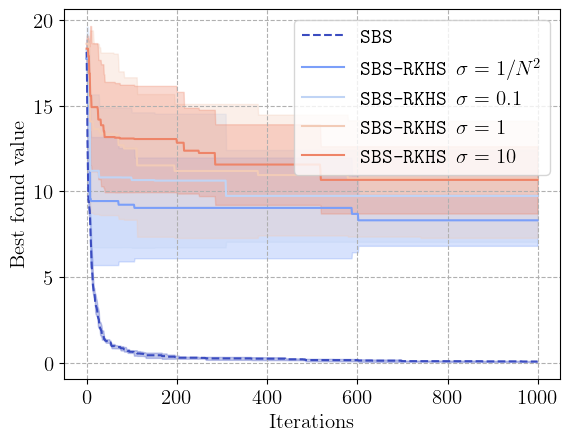

In [10]:
latex_label = lambda s: r"\texttt{" + s.replace("_", r"\_") + "}"

cmap = matplotlib.colormaps["coolwarm"]

c0 = cmap(0)
c1 = cmap(0.2)
c2 = cmap(0.4)
c3 = cmap(0.6)
c4 = cmap(0.8)

plt.rcParams.update({"font.size": 15})

mean = mins.mean(axis=0)
std = mins.std(axis=0)
plt.plot(mean, label=latex_label("SBS"), linestyle="--", color=c0)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c0)

mean = mins_sigma.mean(axis=0)
std = mins_sigma.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 1 / N^2$"), linestyle="-", c=c1)
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.3, color=c1)

mean = mins_sigma_01.mean(axis=0)
std = mins_sigma_01.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 0.1$"), linestyle="-", c=c2)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c2)

mean = mins_sigma_1.mean(axis=0)
std = mins_sigma_1.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 1$"), linestyle="-", c=c3)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c3)

mean = mins_sigma_10.mean(axis=0)
std = mins_sigma_10.std(axis=0)
plt.plot(mean, label=latex_label(r"SBS-RKHS $\sigma = 10$"), linestyle="-", c=c4)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c4)

plt.xlabel(r"$\textrm{Iterations}$")
plt.ylabel(r"$\textrm{Best found value}$")
plt.grid(linestyle="--")
plt.legend()
plt.savefig(f"sbs_vs_rkhs.pdf", bbox_inches="tight")